# INTRODUCCIÓN
Este software, desarrollado completamente en python, tiene la funcionalidad de leer una base de datos basada en Darwin Core y poder realizar un análisis de esta, a continuación se da una lista de las funciones implementadas que se tiene.  Por el momento para mostrar tus datos es necesario que tu proyecto este alojado en GitHub.

 - Leer bases de datos basadas en DwC en formato .xlsx o .csv.
 - Eliminar columnas vacias que poseas en tu base de datos.
 - Identificar columnas que no pertenezcan a DwC.
 - Obtener códigos Qr que dirigan a un link con la información de tu base de datos. 
 - Poder filtrar tus datos para poder realizar cambios u obtener solo una lista de estos.

> Recomendamos utilizar la versión de jupyter notebook, si es que no estas familiarizado con python, será mucho más facil. 
> Tambien existe la versión pura del código en python, es exactamente igual a la de jupyter, salvo excepciones para mejor visualización de los datos en jupyter.

# EJECUCIÓN DEL PROGRAMA
## Instalación de paquetes
Dentro del repositorio se encuentra un archivo de texto, llamado "requeriments.txt" el cual contiene todos los paquetes para la correcta ejecución de este programa, antes de esto se recomienda tener lo siguiente instalado.

 - python >= 3.6
 - package manager pip

También es posible instalar conda, pero no se han realizado pruebas con este.
La primera acción si deseas ejecutar esto, directamente en tu pc, debes escribir lo siguiente en la terminal abierta en donde has descargado el repositorio y ejecutar lo siguiente. 

    pip install -U -r requirements.txt

Tambien se ha desarrollado la posibilidad de ejecutar esto en "Jupyter Notebook". Si es primera vez que instalas python y no tienes conda debes ejecutar lo siguiente

    pip install jupyter

Luego 

    Jupyter Notebook

Y tendrás una ventana en tu navegador como la siguiente.
![jupyter notebook init](https://lh3.googleusercontent.com/HLbKzsT1i5E8H33-IZ3EwOt1dtB55Jl6-nLQ03JcY80AsMlrUOJRLSsZz9CJNVPIYZuhNLpgSHvu "jupyter screenshot")
ahí debes abrir el archivo "main.ipynb" y ejecutar este, este archivo esta preconfigurado, por lo que solo debes ejecutarlo y se instalarán todas las dependencias faltantes automáticamente, y el programa se ejecutará. 

## Primeros pasos
 - Primero que todo es necesario darle un formato específico a el archivo a leer por el software, el formato consta de lo siguiente, en la primera fila debe ir el nombre de las columnas de DwC, no importa el orden de estas, y debajo de estas debe ir la información, a continuación se muestra una imagen de como debe ser.
 -  lo siguiente es abrir el archivo "main.ipynb", como se indico anteriormente

 - Luego debes modificar las lineas de código llamadas "longurl", de la siguiente forma, originalmente estás se encontrarán así.

       longurl=f'https://raw.githubusercontent.com/user_name/repo_name/master/files/{id}.txt'

- Donde :

  user_name: corresponde al nombre de usuario de tu cuenta GitHub.
  repo_name: corresponde al nombre del repositorio que mantiene tu proyecto.
 Por lo tanto al reemplazar quedaría de la siguiente forma.
 
		 longurl=f'https://raw.githubusercontent.com/marcelooyaneder/Arboretum_Antumapu/master/files/{id}.txt'

 - Paso siguiente es alojar todos los archivos que necesitas en tu repositorio GitHub, adjunto un video en caso de que no conozcas el proceso.
 
[![](http://img.youtube.com/vi/gjMEehpSTNk/0.jpg)](http://www.youtube.com/watch?v=gjMEehpSTNk "")
 
- Por último es ejecutar el código, para esto en la ventana de jupyter notebook ir a la pestaña

> kernel >
> Restart & Run all

- Seguir las indicaciones del software

# Package installation & configs of the notebook

In [1]:
%matplotlib inline

In [2]:
!pip install -U -r requirements.txt 

Requirement already up-to-date: jupyter in c:\users\oyane\appdata\local\programs\python\python37-32\lib\site-packages (from -r requirements.txt (line 1)) (1.0.0)
Requirement already up-to-date: pandas in c:\users\oyane\appdata\local\programs\python\python37-32\lib\site-packages (from -r requirements.txt (line 2)) (0.25.3)
Requirement already up-to-date: pyqrcode in c:\users\oyane\appdata\local\programs\python\python37-32\lib\site-packages (from -r requirements.txt (line 3)) (1.2.1)
Requirement already up-to-date: pypng in c:\users\oyane\appdata\local\programs\python\python37-32\lib\site-packages (from -r requirements.txt (line 4)) (0.0.20)
Requirement already up-to-date: easygui in c:\users\oyane\appdata\local\programs\python\python37-32\lib\site-packages (from -r requirements.txt (line 5)) (0.98.1)
Requirement already up-to-date: Pillow in c:\users\oyane\appdata\local\programs\python\python37-32\lib\site-packages (from -r requirements.txt (line 6)) (6.2.1)
Requirement already up-to-da

# Main 

In [3]:
# -*- coding: utf-8 -*-

#package imports

import pandas as pd
import os
import errno
import pyqrcode
from pathlib import Path
import filecmp
import shutil
from python_firebase_url_shortener.url_shortener import UrlShortener
import time
import sys
import easygui as eg
import numpy 
from PIL import Image
from IPython.display import display

#autoidenficar el separator en csv ; o ,
class file_manager:
    def file_opener(self):
        #search if a csv file has been created previusly 
        try:
            data=pd.read_csv('dataframe.csv',header=0,sep=';') #ver como variar de ; o ,
        except:
            file_path=eg.fileopenbox(msg='pick the file wish contain your data',title='directory',default='*',filetypes=None,multiple=False)
            if file_path.endswith('.xlsx') or file_path.endswith('.xls'):
                data=pd.read_excel(file_path,sheet_name='Hoja1',header=0)
            elif file_path.endswith('.csv'):
                data=pd.read_csv(file_path,header=0,sep=';') #ver como variar de ; o ,
        columns_df=data.columns.tolist()
        msg='select a column to be the index of the dataframe'
        title='select index'       
        indexo=eg.choicebox(msg,title,columns_df)
        data=data.set_index(indexo, drop = False)
        og_data=data.copy()
        og_columns_df=og_data.columns.tolist()
        columns_dwc=pd.read_csv('documents\dwc_terms\simple_dwc_horizontal.csv',header=0,sep=';').columns.tolist() #ver como variar de ; o , 
        columns_difference=list(set(columns_df)-set(columns_dwc))
        if not columns_difference:
            pass
        else:
            msg='the followings columns do not belong to DwC, select the ones you wish to delete'
            title='select to delete'       
            choicebox=eg.multchoicebox(msg,title,columns_difference)
            try:
                for label in choicebox:
                    data.drop(label,axis=1,inplace=True)
            except:
                pass
        empty_columns_drop_answer=eg.ynbox(msg='Do you wish to delete the empty columns?...',title='Drop empty columns') #a way to drop fully empty columns
        if empty_columns_drop_answer==True:
            data.dropna(axis=1, how='all',inplace=True)
            og_data.dropna(axis=1, how='all',inplace=True)
            og_data.to_csv('online_dataframe.csv',sep=',')
        else:
            pass
        return og_data,data,indexo,og_columns_df
    
    def file_creation(self):
        Record_level=pd.read_csv('documents\dwc_terms\Record_level.csv',header=0,sep=';',encoding = 'unicode_escape')
        Ocurrence=pd.read_csv('documents\dwc_terms\Ocurrence.csv',header=0,sep=';',encoding = 'unicode_escape')
        Organism=pd.read_csv('documents\dwc_terms\organism.csv',header=0,sep=';',encoding = 'unicode_escape')
        Material_sample=pd.read_csv('documents\dwc_terms\MaterialSample.csv',header=0,sep=';',encoding = 'unicode_escape')
        Event=pd.read_csv('documents\dwc_terms\event.csv',header=0,sep=';',encoding = 'unicode_escape')
        Location=pd.read_csv('documents\dwc_terms\location.csv',header=0,sep=';',encoding = 'unicode_escape')
        Geological_Context=pd.read_csv('documents\dwc_terms\GeologicalContext.csv',header=0,sep=';',encoding = 'unicode_escape')
        Identification=pd.read_csv('documents\dwc_terms\identification.csv',header=0,sep=';',encoding = 'unicode_escape')
        Taxon=pd.read_csv('documents\dwc_terms\Taxon.csv',header=0,sep=';',encoding = 'unicode_escape')
        columns_dwc=[Record_level,Ocurrence,Organism,Material_sample,Event,Location,Geological_Context,Identification,Taxon]
        dwc_columns=[]
        for dataframe in columns_dwc:
            level_list=[]
            for rows in dataframe.itertuples():
                    # Create list for the current row 
                    my_list =f'{rows.standardFieldName}-{rows.verbatimFieldName}-{rows.uri}'   
                    # append the list to the final list 
                    level_list.append(my_list)
            msg='select the terms for your custom dwc dataframe'
            title='select terms'       
            choicebox=eg.multchoicebox(msg,title,level_list)
            try:
                for elements in choicebox:
                    try:
                        indice=level_list.index(elements)
                        value=dataframe['standardFieldName'][indice]
                        dwc_columns.append(value)
                    except:
                        pass
            except:
                pass
        dataframe=pd.DataFrame(columns=dwc_columns)
        return dataframe

class subject:
    def __init__(self,data):
        self.data=data

    def datafiltering(self,data):
        columns_df=data.columns.tolist()
        msg='select a value to query'
        title='select'
        choicebox=eg.choicebox(msg,title,columns_df)
        querys=data[choicebox].unique()
        query_choicebox=eg.choicebox(msg,title,querys)
        data.query(f"{choicebox}=='{query_choicebox}'",inplace=True) 
        return data
    
    def datafiltering_predef(self,data,column):
        msg='select a value to query'
        title='select'
        querys=data[column].unique()
        query_choicebox=eg.choicebox(msg,title,querys)
        data.query(f"{column}=='{query_choicebox}'",inplace=True) 
        return data

    def change_values(self,data,og_data,subjects): 
        IDs_for_change=eg.multchoicebox(msg='Select the subject(s) for a change: ',title='Select...',choices=subjects)    
        columns=data.columns.tolist()
        new_value_change=True
        while new_value_change==True:
            values_to_change=eg.choicebox(msg='The following values are available for change: ',title='Select...',choices=columns)
            set_value=eg.enterbox(msg=f'Enter a new value for {values_to_change}: ',title='New value...')
            for values in IDs_for_change:
                try:
                    data.at[values,values_to_change]=set_value
                    data.at[values,'acceptedNameUsage']= '{0} {1} {2}'.format(data.at[values,'genus'],data.at[values,'specificEpithet'],data.at[values,'nameAcordingTo'])
                    og_data.at[values,values_to_change]=set_value
                    og_data.at[values,'acceptedNameUsage']= '{0} {1} {2}'.format(data.at[values,'genus'],data.at[values,'specificEpithet'],data.at[values,'nameAcordingTo'])
                except:
                    print('The changes can not be made')
                    pass
            new_value_change=eg.ynbox(msg='Do you want to change another values in this subjects?',title='Value change')
        return data
        
    def add_values(self,data):
        msg = "Enter information about the new subject"
        title = "New subject entry "
        last_indexo =data.index[-1]
        new = int(last_indexo, 36) + 1
        new_id=numpy.base_repr(new, 36)
        fieldNames = data.columns.tolist()[1:]
        fieldValues = []
        fieldValues = eg.multenterbox(msg,title, fieldNames)
        fieldValues.insert(0,new_id)
        data.loc[fieldValues[0]]=fieldValues
        return data

    def save_values(self,data): #programar para que tire a csv
        path_choice=eg.diropenbox(msg='choose a folder to save a file',title='select a path')
        folder_name=eg.enterbox(msg='Enter the filename', title='Filename', default='DataFrame', strip=True, image=None, root=None)
        with pd.ExcelWriter(f"{path_choice}\{folder_name}.xlsx") as writer:
            data.to_excel(writer, sheet_name='DataFrame')
    

def comparefiles(ID,info,option): #option 1 for showroom, 0 files 
    filename1 = f"temp/{ID}.txt"
    if option==1:
        filename2= f"showroom_files/{ID}.txt"
    elif option==0:
        filename2= f"files/{ID}.txt"
    os.makedirs(os.path.dirname(filename1), exist_ok=True)
    with open(filename1,'w') as fil:
        fil.write(str(info))
    if os.path.isfile(filename2)==True:
        if filecmp.cmp(filename1,filename2)==False:
            print(f'ive found some changes since the last time, on file... {ID}.txt')
            print('changes has been saved')
            shutil.move(filename1,filename2)
        else:
            pass
    else:
        print(f'a new entry has been found, file... {ID}.txt has been created.')
        os.makedirs(os.path.dirname(filename2), exist_ok=True)
        with open(filename2,'w') as fil:
            fil.write(str(info))
    shutil.rmtree('temp/', ignore_errors=False, onerror=None)
    return 

def infowriting(ID,info,option):  #option 1 for showroom, 0 files
    try: 
        if option ==0:
            filename = f"files/{ID}.txt" 
        elif option==1:
            filename = f"showroom_files/{ID}.txt" 
        os.makedirs(os.path.dirname(filename), exist_ok=True)
        with open(filename,'w') as fil:
            fil.write(str(info))
        print(f'a new entry has been found, file...{ID}.txt has been created.')
    except:
        print(f'permission to write in {filename} has been denied...')
    return 

def dynamiclinks(longurl):
    user_info=pd.read_csv("documents\dynamiclinks_user_info.csv",header=0,sep=';')
    api_key=user_info['api_key'][0] #this need to be created on the firebase webpage
    sub_domain=user_info['sub_domain'][0] #this need to be created on firebase webpage
    try:
        url_shortener = UrlShortener(api_key,sub_domain)
        shorturl=url_shortener.get_short_link(longurl)
    except:
        print('Oops! you have reached the limit of urls')
    time.sleep(0.2) #to not break the limits of firebase
    return shorturl

#crear un Qr para showroom 
#Crear un Qr para manejo del lab
def qr_manager(ID,short_url,option): #option 1 for showroom, 0 files
    try:
        if option ==0:
            filename = f"qrs/{ID}.png"
        elif option==1:
            filename = f"qrs_showroom/{ID}.png"
        os.makedirs(os.path.dirname(filename), exist_ok=True)
        quick_response_code= pyqrcode.create(short_url)
        with open(filename, 'wb') as f:
                quick_response_code.png(f, scale=8,module_color=(0,102,0,255),background=(255, 255, 255, 255))
        try:
            img = Image.open(filename)
            width, height = img.size
            logo_size =50
            logo = Image.open('documents\logo.png')
            xmin = ymin = int((width / 2) - (logo_size / 2))
            xmax = ymax = int((width / 2) + (logo_size / 2))
            logo = logo.resize((xmax - xmin, ymax - ymin))
            img.paste(logo, (xmin, ymin, xmax, ymax))
            img.save(filename)
        except:
            pass
    except:
        print(f'permission to write in {filename} has been denied...')

####################################################################
##############################MAIN##################################
####################################################################

#######################################
########FILE MANAGEMENT SECTION########
#######################################

dataframe=file_manager()
file_mng_button=eg.buttonbox(msg='select an option',title='select an option',choices=['Open a file','Create a custom dwc file'])
if file_mng_button=='Open a file':
    og_data,data,indexo,og_columns_df=dataframe.file_opener() #no considerar para file_creation
    IDs=data.index.tolist() #no considerar para file_creation 
    showroom_option_button=eg.buttonbox(msg='do you wish to create files for a showroom',title='select a option',choices=['Yes','No'])
    if showroom_option_button=='Yes':
        data_showroom=og_data.copy()
        msg='select the columns to keep on your showroom dataframe'
        title='select'
        choicebox=eg.multchoicebox(msg,title,og_columns_df)
        showroom_columns=list(set(og_columns_df)-set(choicebox)) #columnas que no estan presentes
        try:
            for label in showroom_columns:
                data_showroom.drop(label,axis=1,inplace=True)
        except:
            pass
    elif showroom_option_button=='No':
        pass
elif file_mng_button=='Create a custom dwc file':
    data=dataframe.file_creation() #no considerar para file_opener
    data.to_csv('custom_dwc_frame.csv',sep=';', encoding='utf-8') #considerar para file opener
    print ('your file is ready....')
    display(data)
    exit()

display(data)

##################################
########QUERY DATA SECTION########
##################################

query_choicebox_options=['Yes...Custom query','Query by: order-family-genus-specificEpithet','Query by: Class-order-family-genus-specificEpithet','No']
query_choicebox=eg.choicebox(msg='Do you wish to query your data...',title='Query options',choices=query_choicebox_options)
if query_choicebox==query_choicebox_options[0]:
    data_for_query=data.copy()
    r1=subject(data_for_query)
    answer_query_choicebox=True
    while answer_query_choicebox==True:
        r1.datafiltering(data_for_query)
        print(data_for_query)
        answer_query_choicebox=eg.ynbox(msg='Do you wish to make a new query?',title='Select an option')
    print('Your query has been finished....')
    print(data_for_query)
elif query_choicebox==query_choicebox_options[1]:
    data_for_query=data.copy()
    r1=subject(data_for_query)
    column_query_predef=['order','family','genus','specificEpithet']
    for columns_predef in column_query_predef:
        r1.datafiltering_predef(data_for_query,columns_predef)
    print('Your query has been finished....')
    display(data_for_query)
elif query_choicebox==query_choicebox_options[2]:
    data_for_query=data.copy()
    r1=subject(data_for_query)
    column_query_predef=['Class','order','family','genus','specificEpithet']
    for columns_predef in column_query_predef:
        r1.datafiltering_predef(data_for_query,columns_predef)
    print('Your query has been finished....')
    display(data_for_query)
else:
    pass

if not query_choicebox==query_choicebox_options[3] or query_choicebox==None:
    choicebox_for_after_query_options=['export your query to a xlsx file (readable for excel)','make changes on your query and export them to a xlsx file (this changes will be saved on your original file)','show the subjects wich match your query']
    choicebox_for_after_query=eg.choicebox(msg='Choose an option for your query...',title='Query options',choices=choicebox_for_after_query_options)
    if choicebox_for_after_query==choicebox_for_after_query_options[0]:
        #export your query to a xlsx file (readable for excel)
        r1.save_values(data_for_query)
    elif choicebox_for_after_query==choicebox_for_after_query_options[1]:
        #make changes on your query and export them to a xlsx file (this changes will be saved on your original file)
        query_subjects=data_for_query[indexo].tolist()
        r1.change_values(data,og_data,query_subjects) 
        r1.save_values(og_data) #for saving original data
    elif choicebox_for_after_query==choicebox_for_after_query_options[2]:
        #show the subjects wich match your query
        query_subjects=data_for_query[indexo].tolist()
        for values in query_subjects:
            print(values)
    else:
        pass

#Add values 
#r1.add_values(data)

#compare files or create them
print('compare/create files...')
if os.path.isdir('files')==True:
    for id in IDs:
        comparefiles(id,data.loc[id],0)
else:
    for id in IDs:
        infowriting(id,data.loc[id],0)

if showroom_option_button=='Yes':
    if os.path.isdir('showroom_files')==True:
        for id in IDs:
            comparefiles(id,data_showroom.loc[id],1)
    else:
        for id in IDs:
            infowriting(id,data_showroom.loc[id],1)
print ('there is nothing more to do here...')

#compare qr files or create them
print('create non existing qrs files...')
if os.path.isdir('qrs')==True:
    for id in IDs:
        print(f'file {id} of file {IDs[-1]}',end='\r', flush=True)
        path=f"qrs/{id}.png"
        if os.path.isfile(path)==False:
            longurl=f'https://raw.githubusercontent.com/marcelooyaneder/Arboretum_Antumapu/master/files/{id}.txt'            
            shorturl=dynamiclinks(longurl)
            qr_manager(id,shorturl,0)
        else:
            pass
else:
    for id in IDs:
        print(f'file {id} of file {IDs[-1]}',end='\r', flush=True)
        longurl=f'https://raw.githubusercontent.com/marcelooyaneder/Arboretum_Antumapu/master/files/{id}.txt'
        shorturl=dynamiclinks(longurl)
        qr_manager(id,shorturl,0)

if showroom_option_button=='Yes':
    print('create non existing qrs shorwoom files...')
    if os.path.isdir('showroom_qrs')==True:
        for id in IDs:
            print(f'file {id} of file {IDs[-1]}',end='\r', flush=True)
            path=f"showroom_qrs/{id}.png"
            if os.path.isfile(path)==False:
                longurl=f'https://raw.githubusercontent.com/marcelooyaneder/Arboretum_Antumapu/master/showroom_files/{id}.txt'
                shorturl=dynamiclinks(longurl)
                qr_manager(id,shorturl,1)
            else:
                pass
    else:
        for id in IDs:
            print(f'file {id} of file {IDs[-1]}',end='\r', flush=True)
            longurl=f'https://raw.githubusercontent.com/marcelooyaneder/Arboretum_Antumapu/master/showroom_files/{id}.txt'
            shorturl=dynamiclinks(longurl)
            qr_manager(id,shorturl,1)
else:
    pass
print ('there is nothing more to do here...')

[0]
[0]


,catalogNumber,basisOfRecord,decimalLatitude,decimalLongitude,phylum,Class,order,family,genus,specificEpithet,infraspecificEpithet,nameAcordingTo,verbatimTaxonRank,taxonRank,acceptedNameUsage,establishmentMeans,sex
catalogNumber,,,,,,,,,,,,,,,,,
AA0001,AA0001,LivingSpecimen,348663,6284356,Tracheophyta,Liliopsida,Asparagales,Asparagaceae,Agave,americana,NaN,L.,NaN,species,Agave americana L.,Exótica,NaN
AA0002,AA0002,LivingSpecimen,348674,6284351,Tracheophyta,Pinopsida,Cupressales,Araucariaceae,Araucaria,bidwillii,NaN,Hook.,NaN,species,Araucaria bidwillii Hook.,Exótica,NaN
AA0003,AA0003,LivingSpecimen,348663,6284341,Tracheophyta,Pinopsida,Cupressales,Araucariaceae,Araucaria,heterophylla,NaN,Franco,NaN,species,Araucaria heterophylla Franco,Exótica,NaN
AA0004,AA0004,LivingSpecimen,348660,6284330,Tracheophyta,Pinopsida,Cupressales,Araucariaceae,Araucaria,bidwillii,NaN,Hook.,NaN,species,Araucaria bidwillii Hook.,Exótica,NaN
AA0005,AA0005,LivingSpecimen,348660,6284325,Tracheophyta,Magnoliopsida,Sapindales,Sapindaceae,Aesculus,hippocastanum,NaN,L.,NaN,species,Aesculus hippocastanum L.,Exótica,hermaphrodite
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AA1718,AA1718,LivingSpecimen,348473,6284198,Tracheophyta,Magnoliopsida,Rosales,Rosaceae,Pyrus,NaN,NaN,L.,sp.,genus,Pyrus L.,Exótica,hermaphrodite
AA1719,AA1719,LivingSpecimen,348456,6284380,Tracheophyta,Magnoliopsida,Caryophyllales,Phytolaccaceae,Phytolacca,dioica,NaN,L.,NaN,species,Phytolacca dioica L.,Exótica,NaN
AA1720,AA1720,LivingSpecimen,348529,6284262,Tracheophyta,Liliopsida,Arecales,Arecaceae,Jubaea,chilensis,NaN,Baill.,NaN,species,Jubaea chilensis Baill.,Nativa,hermaphrodite


[0]
compare/create files...
there is nothing more to do here...
create non existing qrs files...
there is nothing more to do here...


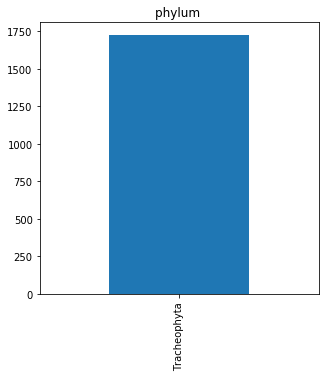

In [4]:
og_data['phylum'].value_counts().plot(kind='bar',title='phylum ',figsize=(5,5))

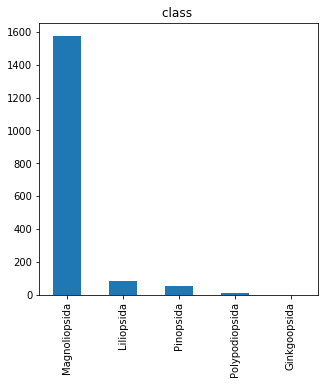

In [5]:
og_data['Class'].value_counts().plot(kind='bar',title='class ',figsize=(5,5))                              

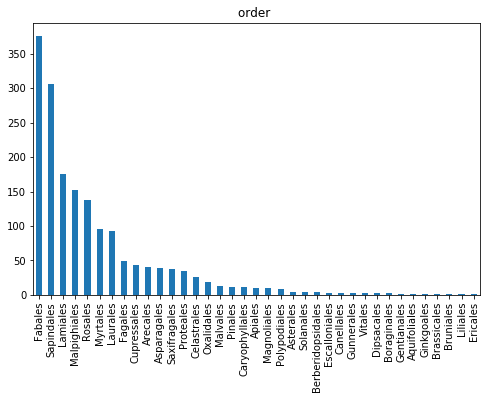

In [6]:
og_data['order'].value_counts().plot(kind='bar',title='order ',figsize=(8,5))

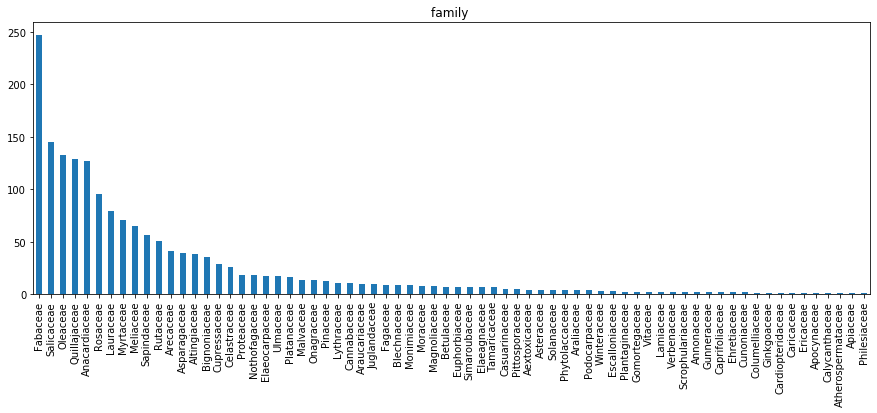

In [7]:
og_data['family'].value_counts().plot(kind='bar',title='family ',figsize=(15,5))

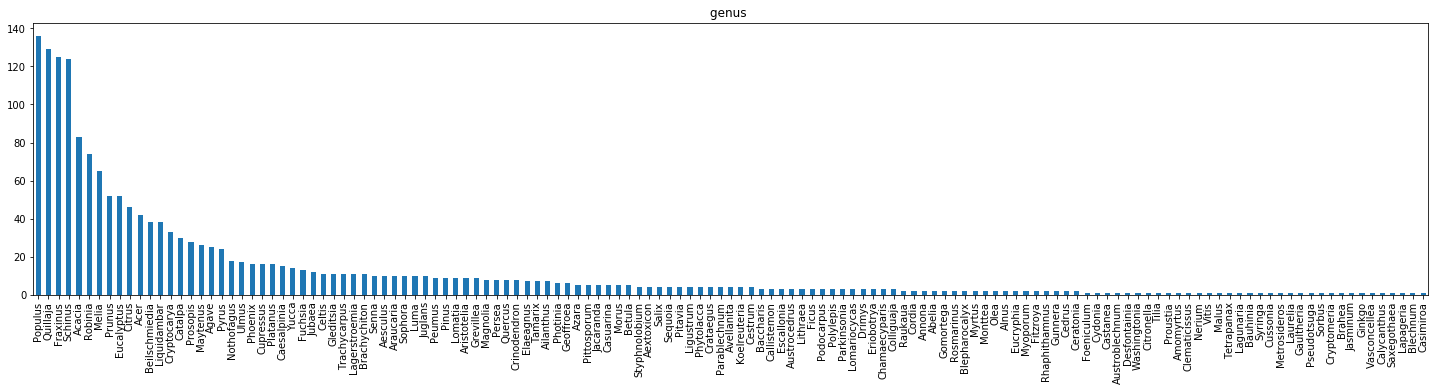

In [8]:
og_data['genus'].value_counts().plot(kind='bar',title='genus ',figsize=(25,5))